# ##Data Scientist Take-Home Challenge##
Candidate: Luis Alejandro Ruvalcaba

## Importing Libraries

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

## Exporting Data

In [130]:
path = "C:/Users/Ruval Lap/Desktop/Jupyter Files/ML/GM/Data_Set/"

In [131]:
# Read data from a CSV file RATING
df_rating = pd.read_csv(path + 'rating.csv')

#Rename columns
df_rating.columns = ['UserId', 'MovieId', 'Rating', 'TimeStamp']
df_rating.head()

,UserId,MovieId,Rating,TimeStamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [132]:
# Read data from a CSV file MOVIE
df_movie = pd.read_csv(path + 'movie.csv')

#Rename columns
df_movie.columns = ['MovieId', 'Title', 'Genres']
df_movie.head()

,MovieId,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [133]:
# Read data from a CSV file TAG
df_tag = pd.read_csv(path + 'tag.csv')

#Rename columns
df_tag.columns = ['UserId', 'MovieId', 'Tag', 'TimeStamp']
df_tag.head()

,UserId,MovieId,Tag,TimeStamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [134]:
# Read data from a CSV file GENOME_SOCRES
df_genome_scores = pd.read_csv(path + 'genome_scores.csv')

#Rename columns
df_genome_scores.columns = ['MovieId', 'TagId', 'Relevance']
df_genome_scores.head()

,MovieId,TagId,Relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [135]:
# Read data from a CSV file GENOME_TAGS
df_genome_tags = pd.read_csv(path + 'genome_tags.csv')

#Rename columns
df_genome_tags.columns = ['TagId', 'TagDescription']
df_genome_tags.head()

,TagId,TagDescription
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [136]:
# Read data from a CSV file LINK
df_link = pd.read_csv(path + 'link.csv')

#Rename columns
df_link.columns = ['MovieID', 'IMD', 'TMD']
df_link.head()

,MovieID,IMD,TMD
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### Review data frame info

In [137]:
df_rating.info()
print("\n*Missing Values*")
print(df_rating.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     int64  
 1   MovieId    int64  
 2   Rating     float64
 3   TimeStamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB

*Missing Values*
UserId       0
MovieId      0
Rating       0
TimeStamp    0
dtype: int64


In [138]:
df_movie.info()
print("\n*Missing Values*")
print(df_movie.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieId  27278 non-null  int64 
 1   Title    27278 non-null  object
 2   Genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB

*Missing Values*
MovieId    0
Title      0
Genres     0
dtype: int64


In [139]:
df_tag.info()
print("\n*Missing Values*")
print(df_tag.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   UserId     465564 non-null  int64 
 1   MovieId    465564 non-null  int64 
 2   Tag        465548 non-null  object
 3   TimeStamp  465564 non-null  object
dtypes: int64(2), object(2)
memory usage: 14.2+ MB

*Missing Values*
UserId        0
MovieId       0
Tag          16
TimeStamp     0
dtype: int64


In [140]:
df_genome_scores.info()
print("\n*Missing Values*")
print(df_genome_scores.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   MovieId    int64  
 1   TagId      int64  
 2   Relevance  float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB

*Missing Values*
MovieId      0
TagId        0
Relevance    0
dtype: int64


In [141]:
df_genome_tags.info()
print("\n*Missing Values*")
print(df_genome_tags.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TagId           1128 non-null   int64 
 1   TagDescription  1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB

*Missing Values*
TagId             0
TagDescription    0
dtype: int64


In [142]:
df_link.info()
print("\n*Missing Values*")
print(df_link.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MovieID  27278 non-null  int64  
 1   IMD      27278 non-null  int64  
 2   TMD      27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB

*Missing Values*
MovieID      0
IMD          0
TMD        252
dtype: int64


### Delete the 16 missing values in the Tag Data Frame, this represents less tan 1%

In [143]:
df_tag = df_tag.dropna()
df_tag.info()
print("\n*Missing Values*")
print(df_tag.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465548 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   UserId     465548 non-null  int64 
 1   MovieId    465548 non-null  int64 
 2   Tag        465548 non-null  object
 3   TimeStamp  465548 non-null  object
dtypes: int64(2), object(2)
memory usage: 17.8+ MB

*Missing Values*
UserId       0
MovieId      0
Tag          0
TimeStamp    0
dtype: int64


# 1.EDA (Exploration Data Analys)

### Merge the data frame

#### The main data frame will be RATING, because is the most relevant because over there is the predicted value or label. 

In [144]:
merged1_df = pd.merge(df_rating, df_movie, on='MovieId')
merged1_df.head()

,UserId,MovieId,Rating,TimeStamp,Title,Genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy


In [145]:
merged2_df = pd.merge(merged1_df, df_tag, on=['UserId', 'MovieId'], how='left')
merged2_df.head()

,UserId,MovieId,Rating,TimeStamp_x,Title,Genres,Tag,TimeStamp_y
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN


In [146]:
#Check the data types of the columns
merged2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20265624 entries, 0 to 20265623
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   UserId       int64  
 1   MovieId      int64  
 2   Rating       float64
 3   TimeStamp_x  object 
 4   Title        object 
 5   Genres       object 
 6   Tag          object 
 7   TimeStamp_y  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ GB


In [147]:
#Check the number of unique values in each column
for column in merged2_df.columns:
    print(column, merged2_df[column].nunique())

UserId 138493
MovieId 26744
Rating 10
TimeStamp_x 15351121
Title 26729
Genres 1329
Tag 34065
TimeStamp_y 362554


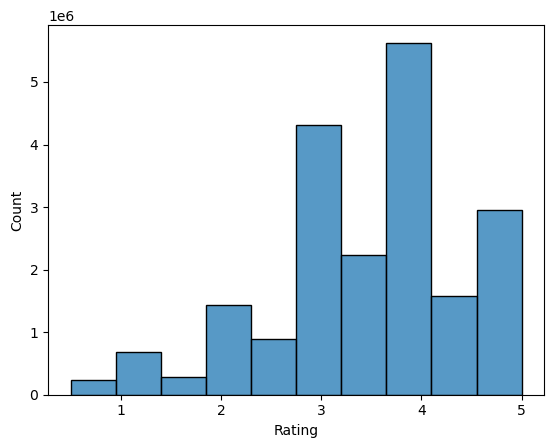

In [148]:
#Check the distribution of the Rating column
sns.histplot(data=merged2_df, x='Rating', bins=10)
plt.show()

In [149]:
#Check the top 10 most rated movies
top_rated_movies = merged2_df.groupby(['MovieId', 'Title']).size().reset_index(name='count').sort_values('count', ascending=False).head(10)
print(top_rated_movies)


      MovieId                                      Title  count
293       296                        Pulp Fiction (1994)  68721
352       356                        Forrest Gump (1994)  66851
315       318           Shawshank Redemption, The (1994)  64273
587       593           Silence of the Lambs, The (1991)  64063
476       480                       Jurassic Park (1993)  60065
257       260  Star Wars: Episode IV - A New Hope (1977)  55066
108       110                          Braveheart (1995)  54057
583       589          Terminator 2: Judgment Day (1991)  52641
2486     2571                         Matrix, The (1999)  52376
523       527                    Schindler's List (1993)  50485


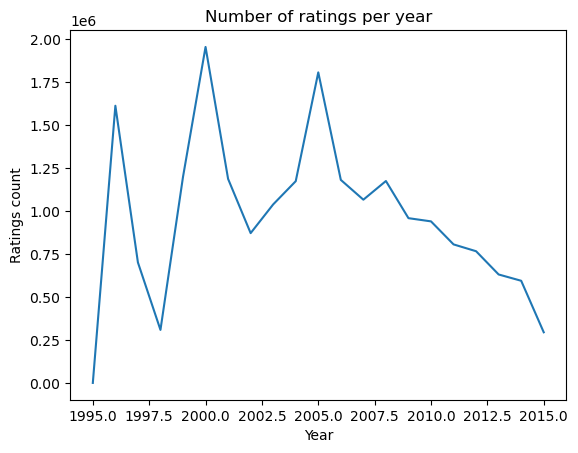

In [150]:
#Check the number of ratings per year
merged2_df['YearStamp'] = pd.to_datetime(merged2_df['TimeStamp_x']).dt.year
ratings_per_year = merged2_df.groupby('YearStamp').size().reset_index(name='count')

# plot the ratings count per year
plt.plot(ratings_per_year['YearStamp'], ratings_per_year['count'])
plt.xlabel('Year Stamp')
plt.ylabel('Ratings count')
plt.title('Number of ratings per year')
plt.show()

In [151]:
#Check most common tags
from collections import Counter

tag_counter = Counter(merged2_df['Tag'].dropna())
print(tag_counter.most_common(10))

[('sci-fi', 3291), ('atmospheric', 2789), ('comedy', 2505), ('action', 2429), ('surreal', 2356), ('based on a book', 2321), ('twist ending', 2277), ('funny', 2009), ('dystopia', 1918), ('dark comedy', 1843)]


# 2.Binary classification

## Modeling structure

In [152]:
# uses a lambda function to apply the condition "rating >= 4" to each value in the "Rating" column. 
# If the condition is true, it assigns a value of 1 to the corresponding row in the new "FlagRating" column. 
# If the condition is false, it assigns a value of 0.
merged2_df['FlagRating'] = merged2_df['Rating'].apply(lambda x: 1 if x >= 4 else 0)

merged2_df.head()

,UserId,MovieId,Rating,TimeStamp_x,Title,Genres,Tag,TimeStamp_y,year,FlagRating
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,2005,0
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0


## Feature Enginnering

In [154]:
# group by MovieId and sum the Relevance column, that can help to have a metric about the tag
df_sum = df_genome_scores.groupby('MovieId')['Relevance'].sum().reset_index()

df_sum.head(10)

,MovieId,Relevance
0,1,180.73100
1,2,134.78025
2,3,104.23100
3,4,96.36150
4,5,111.50625
5,6,177.75375
6,7,110.16150
7,8,91.70450
8,9,86.05325
9,10,133.48900


In [155]:
master_df = pd.merge(merged2_df, df_sum, on='MovieId', how='left')
master_df.head()

,UserId,MovieId,Rating,TimeStamp_x,Title,Genres,Tag,TimeStamp_y,year,FlagRating,Relevance
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,2005,0,134.78025
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025


In [156]:
# extract year from 'Title' column and calculate age of movie, to review if some movies of certain time have 
# better preference
import datetime

current_year = datetime.datetime.now().year
master_df['AgeMovie'] = current_year - master_df['Title'].str.extract(r'(\d{4})').astype(float)

master_df.head()

,UserId,MovieId,Rating,TimeStamp_x,Title,Genres,Tag,TimeStamp_y,year,FlagRating,Relevance,AgeMovie
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,2005,0,134.78025,28.0
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0


In [157]:
#Convert the timestamp features into more meaningful features like year, that could capture trends and patterns 
#in the data based on time.
master_df['YearStamp'] = pd.DatetimeIndex(master_df['TimeStamp_x']).year
master_df.head()

,UserId,MovieId,Rating,TimeStamp_x,Title,Genres,Tag,TimeStamp_y,year,FlagRating,Relevance,AgeMovie,YearStamp
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,2005,0,134.78025,28.0,2005
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996


In [158]:
# Creating a new column with the average rating for each movie, and then using this information to calculate 
# the deviation of each rating from the average

# Create a new column with the average rating for each movie
master_df['AvgRating'] = master_df.groupby('MovieId')['Rating'].transform('mean')

# Calculate the deviation of each rating from the average
master_df['Deviation'] = master_df['Rating'] - master_df['AvgRating']


master_df.head()

,UserId,MovieId,Rating,TimeStamp_x,Title,Genres,Tag,TimeStamp_y,year,FlagRating,Relevance,AgeMovie,YearStamp,AvgRating,Deviation
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,2005,0,134.78025,28.0,2005,3.213844,0.286156
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996,3.213844,-0.213844
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996,3.213844,-0.213844
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996,3.213844,-0.213844
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996,3.213844,-0.213844


In [159]:
# Creating a column with the number of tags associated with each movie, 
# which could be an indication of how well the movie is described 
# or how relevant those tags are to the users.

master_df['NumTags'] = master_df.groupby('MovieId')['Tag'].transform('count')

master_df.head()

,UserId,MovieId,Rating,TimeStamp_x,Title,Genres,Tag,TimeStamp_y,year,FlagRating,Relevance,AgeMovie,YearStamp,AvgRating,Deviation,NumTags
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,2005,0,134.78025,28.0,2005,3.213844,0.286156,120
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996,3.213844,-0.213844,120
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996,3.213844,-0.213844,120
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996,3.213844,-0.213844,120
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996,3.213844,-0.213844,120


In [160]:
# Creating a column with the number of ratings for each movie, 
# which could help to identify movies that have a lot of user feedback 
master_df['NumRatings'] = master_df.groupby('MovieId')['Rating'].transform('count')

master_df.head()

,UserId,MovieId,Rating,TimeStamp_x,Title,Genres,Tag,TimeStamp_y,year,FlagRating,Relevance,AgeMovie,YearStamp,AvgRating,Deviation,NumTags,NumRatings
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,2005,0,134.78025,28.0,2005,3.213844,0.286156,120,22320
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996,3.213844,-0.213844,120,22320
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996,3.213844,-0.213844,120,22320
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996,3.213844,-0.213844,120,22320
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,1996,0,134.78025,28.0,1996,3.213844,-0.213844,120,22320


### *** *** *** *** *** *** *** *** *** *** *** *** *** *** MemoryError *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** 

In [71]:
# Transforming the genres column into a set of dummy variables, to represent the movie's characteristics 
# use get_dummies to create dummy variables for the Genres column

# create dummy variables for the Genres column
dummy_genres = pd.get_dummies(master_df['Genres'])

# add the dummy variables to the original dataframe
master_df = pd.concat([master_df, dummy_genres], axis=1)

# show the updated dataframe
master_df.head()

MemoryError: Unable to allocate 25.1 GiB for an array with shape (1329, 20265624) and data type uint8

### *** *** *** *** *** *** *** *** *** *** *** *** *** *** MemoryError *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** 

### I was looking for the error above, I find this "The MemoryError occurs when the computer runs out of memory to allocate for an operation, The system doesn't have enough available memory to perform the requested operation" 

### So I will try to reduce the size of the data that I´m working with

In [161]:
#Subset the data into a sample size 

subset_master_df = master_df[master_df['Tag'].notna()]
subset_master_df.head()

,UserId,MovieId,Rating,TimeStamp_x,Title,Genres,Tag,TimeStamp_y,year,FlagRating,Relevance,AgeMovie,YearStamp,AvgRating,Deviation,NumTags,NumRatings
256,1629,2,3.5,2008-02-29 07:03:31,Jumanji (1995),Adventure|Children|Fantasy,time travel,2014-03-10 17:42:00,2008,0,134.78025,28.0,2008,3.213844,0.286156,120,22320
273,1741,2,4.0,2002-11-27 17:33:05,Jumanji (1995),Adventure|Children|Fantasy,adapted from:book,2007-05-12 19:02:03,2002,1,134.78025,28.0,2002,3.213844,0.786156,120,22320
274,1741,2,4.0,2002-11-27 17:33:05,Jumanji (1995),Adventure|Children|Fantasy,board game,2007-06-25 00:07:16,2002,1,134.78025,28.0,2002,3.213844,0.786156,120,22320
275,1741,2,4.0,2002-11-27 17:33:05,Jumanji (1995),Adventure|Children|Fantasy,childhood recaptured,2007-05-12 19:02:03,2002,1,134.78025,28.0,2002,3.213844,0.786156,120,22320
276,1741,2,4.0,2002-11-27 17:33:05,Jumanji (1995),Adventure|Children|Fantasy,game,2007-05-12 19:02:03,2002,1,134.78025,28.0,2002,3.213844,0.786156,120,22320


In [162]:
subset_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391444 entries, 256 to 20265617
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   UserId       391444 non-null  int64  
 1   MovieId      391444 non-null  int64  
 2   Rating       391444 non-null  float64
 3   TimeStamp_x  391444 non-null  object 
 4   Title        391444 non-null  object 
 5   Genres       391444 non-null  object 
 6   Tag          391444 non-null  object 
 7   TimeStamp_y  391444 non-null  object 
 8   year         391444 non-null  int64  
 9   FlagRating   391444 non-null  int64  
 10  Relevance    370115 non-null  float64
 11  AgeMovie     391411 non-null  float64
 12  YearStamp    391444 non-null  int64  
 13  AvgRating    391444 non-null  float64
 14  Deviation    391444 non-null  float64
 15  NumTags      391444 non-null  int64  
 16  NumRatings   391444 non-null  int64  
dtypes: float64(5), int64(7), object(5)
memory usage: 53.8+ MB


In [163]:
#Check the different number of Genres
genre_counts = subset_master_df['Genres'].value_counts()
print(genre_counts)

Drama                                 30031
Comedy                                16131
Comedy|Drama                          14277
Drama|Romance                         14171
Comedy|Drama|Romance                  12549
                                      ...  
Adventure|Horror|Mystery|Thriller         1
Action|Children|Comedy|Mystery            1
Action|Fantasy|Sci-Fi|Thriller|War        1
Documentary|Drama|Romance                 1
Children|Fantasy|Musical|Romance          1
Name: Genres, Length: 1088, dtype: int64


### Apply the Elbow Method, to obtain the better number of clustering the Genre Feature

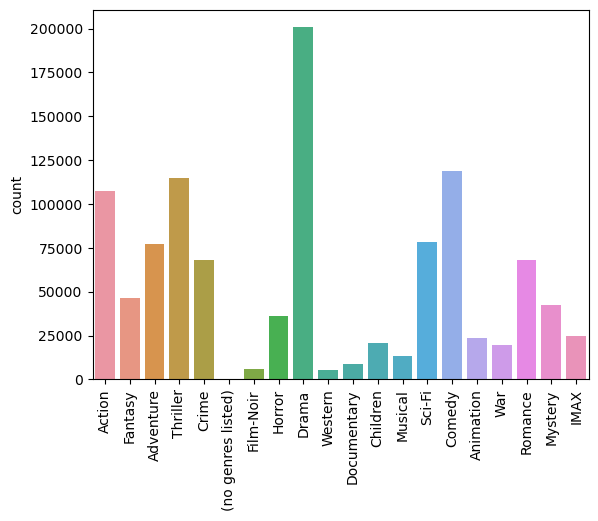

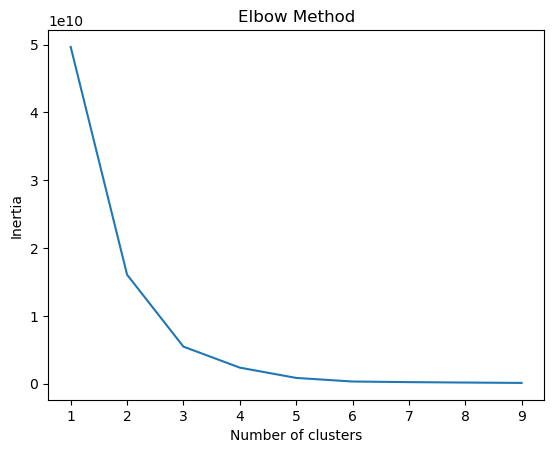

In [164]:
from sklearn.cluster import KMeans

# subset the Genres column
genres = subset_master_df['Genres']

# convert the genres into a list of lists
genre_list = [i.split('|') for i in genres]

# flatten the list of lists
genre_flat_list = [item for sublist in genre_list for item in sublist]

# count the frequency of each genre
genre_counts = {i:genre_flat_list.count(i) for i in set(genre_flat_list)}

# create a dataframe with the genre counts
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count'])

# plot a bar graph to visualize the counts
sns.barplot(x=genre_df.index, y='count', data=genre_df)
plt.xticks(rotation=90)
plt.show()

# define the number of clusters to test
num_clusters = range(1, 10)

# run k-means clustering for each k
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

# obtain the inertia for each k
inertia = [kmeans[i].fit(genre_df[['count']]).inertia_ for i in range(len(kmeans))]

# plot the inertia vs number of clusters
plt.plot(num_clusters, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


### Number of Genre cluster = 3

In [165]:
#Apply the Genre clustering = 3
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

# Subset the data to only include the Genres column
genre_df = subset_master_df[['Genres']]

# Create a binary matrix where each genre is a column
genre_matrix = pd.get_dummies(genre_df['Genres'].str.split('|', expand=True).stack()).sum(level=0)

# Fit KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42).fit(genre_matrix)

# Add the cluster labels to the original dataframe
subset_master_df['GenreCluster'] = kmeans.labels_

subset_master_df.head()

,UserId,MovieId,Rating,TimeStamp_x,Title,Genres,Tag,TimeStamp_y,year,FlagRating,Relevance,AgeMovie,YearStamp,AvgRating,Deviation,NumTags,NumRatings,GenreCluster
256,1629,2,3.5,2008-02-29 07:03:31,Jumanji (1995),Adventure|Children|Fantasy,time travel,2014-03-10 17:42:00,2008,0,134.78025,28.0,2008,3.213844,0.286156,120,22320,0
273,1741,2,4.0,2002-11-27 17:33:05,Jumanji (1995),Adventure|Children|Fantasy,adapted from:book,2007-05-12 19:02:03,2002,1,134.78025,28.0,2002,3.213844,0.786156,120,22320,0
274,1741,2,4.0,2002-11-27 17:33:05,Jumanji (1995),Adventure|Children|Fantasy,board game,2007-06-25 00:07:16,2002,1,134.78025,28.0,2002,3.213844,0.786156,120,22320,0
275,1741,2,4.0,2002-11-27 17:33:05,Jumanji (1995),Adventure|Children|Fantasy,childhood recaptured,2007-05-12 19:02:03,2002,1,134.78025,28.0,2002,3.213844,0.786156,120,22320,0
276,1741,2,4.0,2002-11-27 17:33:05,Jumanji (1995),Adventure|Children|Fantasy,game,2007-05-12 19:02:03,2002,1,134.78025,28.0,2002,3.213844,0.786156,120,22320,0


In [166]:
#Check the different number of Tags
tag_counts = subset_master_df['Tag'].value_counts()
print(tag_counts)

sci-fi                   3291
atmospheric              2789
comedy                   2505
action                   2429
surreal                  2356
                         ... 
Meg White                   1
Joseph Rigano               1
Joie Lee                    1
Isaach De BankolÃ©          1
marcello mastroianni,       1
Name: Tag, Length: 34065, dtype: int64


### Apply the Elbow Method, to obtain the better number of clustering Tags 

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer

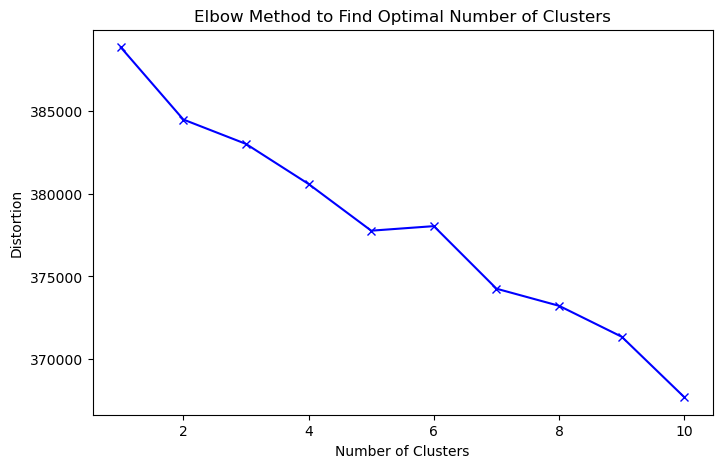

In [169]:
# Create the TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(subset_master_df["Tag"].fillna(""))

# Perform the elbow method to determine the optimal number of clusters
distortions = []
K = range(1, 11)
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X)
    distortions.append(kmeans_model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.show()

### Number of Tags cluster = 5

In [171]:
from sklearn.cluster import KMeans

# extract the Tag column from the dataframe as a numpy array
tags = subset_master_df['Tag'].values

# create a bag of words representation of the tags using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tags)

# apply KMeans clustering algorithm with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# add the cluster labels as a new column 'TagCluster' to the dataframe
subset_master_df['TagCluster'] = kmeans.labels_

subset_master_df.head()

,UserId,MovieId,Rating,TimeStamp_x,Title,Genres,Tag,TimeStamp_y,year,FlagRating,Relevance,AgeMovie,YearStamp,AvgRating,Deviation,NumTags,NumRatings,GenreCluster,TagCluster
256,1629,2,3.5,2008-02-29 07:03:31,Jumanji (1995),Adventure|Children|Fantasy,time travel,2014-03-10 17:42:00,2008,0,134.78025,28.0,2008,3.213844,0.286156,120,22320,0,0
273,1741,2,4.0,2002-11-27 17:33:05,Jumanji (1995),Adventure|Children|Fantasy,adapted from:book,2007-05-12 19:02:03,2002,1,134.78025,28.0,2002,3.213844,0.786156,120,22320,0,0
274,1741,2,4.0,2002-11-27 17:33:05,Jumanji (1995),Adventure|Children|Fantasy,board game,2007-06-25 00:07:16,2002,1,134.78025,28.0,2002,3.213844,0.786156,120,22320,0,0
275,1741,2,4.0,2002-11-27 17:33:05,Jumanji (1995),Adventure|Children|Fantasy,childhood recaptured,2007-05-12 19:02:03,2002,1,134.78025,28.0,2002,3.213844,0.786156,120,22320,0,0
276,1741,2,4.0,2002-11-27 17:33:05,Jumanji (1995),Adventure|Children|Fantasy,game,2007-05-12 19:02:03,2002,1,134.78025,28.0,2002,3.213844,0.786156,120,22320,0,0


In [182]:
#Check NaN values before model
nan_values = subset_master_df.isnull().sum()
nan_percentage  = subset_master_df.isna().mean() * 100
print("NaN Values")
print(nan_values)
print("\n% NaN Values %")
print(nan_percentage)

NaN Values
UserId              0
MovieId             0
Rating              0
TimeStamp_x         0
Title               0
Genres              0
Tag                 0
TimeStamp_y         0
year                0
FlagRating          0
Relevance       21329
AgeMovie           33
YearStamp           0
AvgRating           0
Deviation           0
NumTags             0
NumRatings          0
GenreCluster        0
TagCluster          0
dtype: int64

% NaN Values %
UserId          0.00000
MovieId         0.00000
Rating          0.00000
TimeStamp_x     0.00000
Title           0.00000
Genres          0.00000
Tag             0.00000
TimeStamp_y     0.00000
year            0.00000
FlagRating      0.00000
Relevance       5.44880
AgeMovie        0.00843
YearStamp       0.00000
AvgRating       0.00000
Deviation       0.00000
NumTags         0.00000
NumRatings      0.00000
GenreCluster    0.00000
TagCluster      0.00000
dtype: float64


In [183]:
#Delete Nan Values
subset_master_df.dropna(inplace=True)

In [184]:
#Check NaN values to confirm 
nan_values = subset_master_df.isnull().sum()
nan_percentage  = subset_master_df.isna().mean() * 100
print("NaN Values")
print(nan_values)
print("\n% NaN Values %")
print(nan_percentage)

NaN Values
UserId          0
MovieId         0
Rating          0
TimeStamp_x     0
Title           0
Genres          0
Tag             0
TimeStamp_y     0
year            0
FlagRating      0
Relevance       0
AgeMovie        0
YearStamp       0
AvgRating       0
Deviation       0
NumTags         0
NumRatings      0
GenreCluster    0
TagCluster      0
dtype: int64

% NaN Values %
UserId          0.0
MovieId         0.0
Rating          0.0
TimeStamp_x     0.0
Title           0.0
Genres          0.0
Tag             0.0
TimeStamp_y     0.0
year            0.0
FlagRating      0.0
Relevance       0.0
AgeMovie        0.0
YearStamp       0.0
AvgRating       0.0
Deviation       0.0
NumTags         0.0
NumRatings      0.0
GenreCluster    0.0
TagCluster      0.0
dtype: float64


## Model Implementation

#### •Linear regression: This model could be useful if there is a linear relationship between the input features and the target variable (rating).

#### The selected features for the model are good hyperparameters because they capture different aspects that can influence the rating of a movie: 
•**Deviation:** This feature measures the deviation of a user's rating from the average rating of the movie. This can help us understand if the rating of a movie is affected by the user's perception of the movie.

•**AgeMovie:** This feature represents the age of a movie at the time it was rated. This can help us understand if the age of a movie has any impact on its rating

•**Relevance:** This feature measures the relevance of a tag to a movie. A highly relevant tag can potentially influence the rating of a movie.

•**YearStamp:** This feature represents the year in which a user rated a movie. This can help us understand if the rating of a movie is affected by the year it was rated.

•**AvgRating:** This feature represents the average rating of a movie across all users. This can help us understand if the rating of a movie is affected by its overall popularity.

•**NumTags:** This feature represents the number of tags associated with a movie. A movie with more tags can potentially be more popular and thus have a higher rating.

•**NumRatings:** This feature represents the number of ratings received by a movie. A movie with more ratings can potentially be more popular and thus have a higher rating.

•**GenreCluster:** This feature represents the cluster to which a movie's genre belongs. This can help us understand if the rating of a movie is affected by its genre.

•**TagCluster:** This feature represents the cluster to which a movie's tags belong. This can help us understand if the rating of a movie is affected by its associated tags

•**FlagRating:** This feature indicates whether a rating has been flagged by a user as inappropriate or not. This can potentially affect the rating of a movie.


In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [186]:
# Select the features for the model
features = ['FlagRating', 'YearStamp', 'Relevance', 'AgeMovie', 'AvgRating', 'Deviation', 'NumTags', 'NumRatings', 'GenreCluster', 'TagCluster']

In [187]:
# Split the data into training(70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(subset_master_df[features], subset_master_df['Rating'], test_size=0.3, random_state=42)


In [188]:
# Create the linear regression model
lr_model = LinearRegression()

In [189]:
# Train the model using the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [190]:
# Make predictions on the test data
y_pred = lr_model.predict(X_test)

In [191]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Get the coefficients for each feature
coef_dict = {}
for coef, feat in zip(lr_model.coef_, features):
    coef_dict[feat] = coef

# Print the feature importance
print("Feature importance:")
for feature, importance in sorted(coef_dict.items(), key=lambda x: -abs(x[1])):
    print(feature, importance)

Mean squared error: 2.990063279052227e-26
Feature importance:
Deviation 0.9999999999999979
AvgRating 0.999999999999988
FlagRating 3.6076151811441786e-13
YearStamp -6.909286692516538e-16
AgeMovie 8.407576322759989e-17
TagCluster 4.551131256684545e-17
GenreCluster 3.212723256881795e-17
Relevance -2.9437618659538517e-17
NumTags -8.300953909917534e-18
NumRatings 3.634461527580492e-19


## Feature importance

The Mean **Squared Error (MSE)** is a measure of how well the linear regression model fits the data, with a lower value indicating a better fit. In this case, the **MSE is very low**, which suggests that **the model fits the data well**.

The Feature Importance section lists the importance of each feature in the model, where a higher value indicates greater importance.

**Deviation has the highest importance** value of 0.9999999999999979,  which means it has the strongest impact on the target variable (Rating).

**AvgRating has the second-highest** importance value of 0.999999999999988, indicating it also has a strong impact on the target variable.

FlagRating has a very small importance value of 3.6076151811441786e-13, suggesting that it has little to no impact on the target variable.

YearStamp has a negative importance value of -6.909286692516538e-16, which suggests that it has a slight negative impact on the target variable.

AgeMovie, TagCluster, GenreCluster, Relevance, NumTags, and NumRatings all have importance values that are very close to zero, indicating that they have little to **no impact on the target variable**

# 4. Conclusions

**Work Summarize:**

•The linear regression model performed ok, with a very low mean squared error, indicating a **good fit to the data**

•The feature importance analysis shows that the **deviation and average rating have the strongest** relationship with the target variable

•Overall, the results of this analysis **provide useful insights** into the factors that influence movie ratings


**Some ideas to improve the model are:**

•There may be other factors that were not included in the analysis that could also be important, such as the **specific user who provided the rating or the context in which the rating was given**

•**Model Selection:** Experiment with different types of regression models and compare their performance

•**Hyperparameter Tuning:** Fine-tune the hyperparameters of the model to see if there are any settings that improve its performance

## Thank You! ..... #HappyCoding